In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]


In [3]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/c38/Oct-18-2024-23-12-40_0.01600687204597684_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 100])
output_trimmed = output_trimmed.reset_index(drop=True)
output_trimmed = output_trimmed[~output_trimmed["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


4.0 0.0003854698585890583 13
4.5 0.00032502257088962817 13
5.0 0.0002811831543105481 13
5.5 0.0004268534845244411 12
6.0 0.0003808936205035572 12


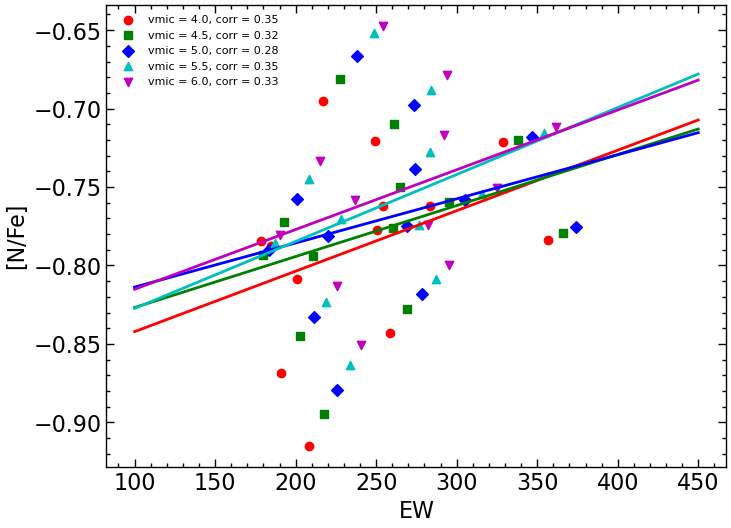

In [15]:
vmics = np.unique(output_trimmed["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_trimmed3 = output_trimmed[output_trimmed["Microturb"] == vmic]
    ews = np.array(output_trimmed3["ew"])
    nfes = np.array(output_trimmed3["O_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    # choose_idxs = np.where(np.abs(nfes - mean_nfe) < 20*std_nfe)
    choose_idxs = np.where(ews < 380)
    choose_idxs = choose_idxs[0]
    choose_idxs2 = np.where(np.abs(nfes - mean_nfe) < 3*std_nfe)
    choose_idxs2 = choose_idxs2[0]
    choose_idxs = np.intersect1d(choose_idxs, choose_idxs2)
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(100, 450, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [48]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/c38/Nov-12-2024-01-41-22_0.627783808675145_LTE_C_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [49]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,C38_clean.txt,22743.35,22742.0,22744.7,2.0243,0.0,0.9621,6.0,0.0,0.0,3.675540,205.2627,0,0
3,C38_clean.txt,22868.25,22867.0,22869.5,-2.5000,0.0,1.2213,6.0,0.0,0.0,11.078550,124.1885,0,10000000
4,C38_clean.txt,22879.25,22877.0,22881.5,-2.3204,0.0,1.1025,6.0,0.0,0.0,14.752008,382.9354,0,0
5,C38_clean.txt,23067.25,23065.0,23069.5,0.7150,0.0,1.1863,6.0,0.0,0.0,7.495507,379.1627,0,0
6,C38_clean.txt,23336.60,23333.5,23339.7,0.0922,0.0,1.2918,6.0,0.0,0.0,6.490576,503.8849,0,0


In [50]:
(solar_abundances['C']+np.mean(output_trimmed["C_Fe"].values)).round(3), np.std(output_trimmed["C_Fe"].values)

(np.float64(9.713), np.float64(0.11316543641942979))

In [57]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/c38/Nov-12-2024-01-43-07_0.753959693989042_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed[output_trimmed["N_Fe"]+solar_abundances['N'] > 8.9]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [58]:
np.mean(output_trimmed["chi_squared"])

np.float64(5.878494148040662)

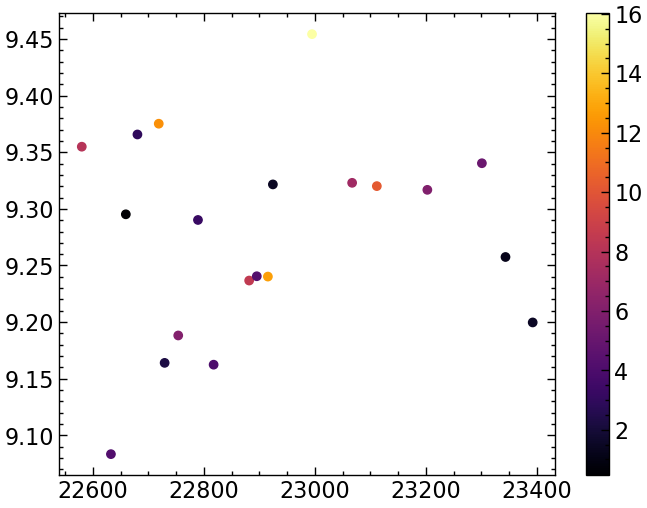

In [59]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [60]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

(np.float64(9.276), np.float64(0.086))

In [61]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/c38/fitlist', sep='  ')

/tmp/ipykernel_1285315/4030067597.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/c38/fitlist', sep='  ')


In [53]:
rats = np.arange(0.5, 1.1,0.025)
rats = np.repeat(rats, 5)
rats

array([0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.525, 0.525, 0.525, 0.525,
       0.525, 0.55 , 0.55 , 0.55 , 0.55 , 0.55 , 0.575, 0.575, 0.575,
       0.575, 0.575, 0.6  , 0.6  , 0.6  , 0.6  , 0.6  , 0.625, 0.625,
       0.625, 0.625, 0.625, 0.65 , 0.65 , 0.65 , 0.65 , 0.65 , 0.675,
       0.675, 0.675, 0.675, 0.675, 0.7  , 0.7  , 0.7  , 0.7  , 0.7  ,
       0.725, 0.725, 0.725, 0.725, 0.725, 0.75 , 0.75 , 0.75 , 0.75 ,
       0.75 , 0.775, 0.775, 0.775, 0.775, 0.775, 0.8  , 0.8  , 0.8  ,
       0.8  , 0.8  , 0.825, 0.825, 0.825, 0.825, 0.825, 0.85 , 0.85 ,
       0.85 , 0.85 , 0.85 , 0.875, 0.875, 0.875, 0.875, 0.875, 0.9  ,
       0.9  , 0.9  , 0.9  , 0.9  , 0.925, 0.925, 0.925, 0.925, 0.925,
       0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.975, 0.975, 0.975, 0.975,
       0.975, 1.   , 1.   , 1.   , 1.   , 1.   , 1.025, 1.025, 1.025,
       1.025, 1.025, 1.05 , 1.05 , 1.05 , 1.05 , 1.05 , 1.075, 1.075,
       1.075, 1.075, 1.075, 1.1  , 1.1  , 1.1  , 1.1  , 1.1  ])

In [54]:
len(rats)

125

In [55]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Fe),A(N),A(Mg),A(Na),A(S),oisorat
0,C38_clean.txt,0.0,5250.0,1.0,0.0,5.0,7.5,11.5,9.3,8.0,7.4,8.5,7.75,6.9,7.66,0.5
1,C38_clean.txt,0.0,5250.0,1.0,0.0,5.0,7.5,11.5,9.3,8.0,7.4,8.5,7.75,6.9,7.66,0.5
2,C38_clean.txt,0.0,5250.0,1.0,0.0,5.0,7.5,11.5,9.3,8.0,7.4,8.5,7.75,6.9,7.66,0.5
3,C38_clean.txt,0.0,5250.0,1.0,0.0,5.0,7.5,11.5,9.3,8.0,7.4,8.5,7.75,6.9,7.66,0.5
4,C38_clean.txt,0.0,5250.0,1.0,0.0,5.0,7.5,11.5,9.3,8.0,7.4,8.5,7.75,6.9,7.66,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,C38_clean.txt,0.0,5250.0,1.0,0.0,5.0,7.5,11.5,9.3,8.0,7.4,8.5,7.75,6.9,7.66,1.1
121,C38_clean.txt,0.0,5250.0,1.0,0.0,5.0,7.5,11.5,9.3,8.0,7.4,8.5,7.75,6.9,7.66,1.1
122,C38_clean.txt,0.0,5250.0,1.0,0.0,5.0,7.5,11.5,9.3,8.0,7.4,8.5,7.75,6.9,7.66,1.1
123,C38_clean.txt,0.0,5250.0,1.0,0.0,5.0,7.5,11.5,9.3,8.0,7.4,8.5,7.75,6.9,7.66,1.1


In [57]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/c38/fitlist_comb', sep=' ', index=False)

In [2]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/c38/Oct-18-2024-23-20-02_0.23644974799451057_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/c38/Oct-18-2024-13-33-04_0.8528135827301694_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [3]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [4]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(0.4937678375340997)

In [5]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

0.73 0.26 -0.21


Text(0.5, 0, '16O/18O ratio')

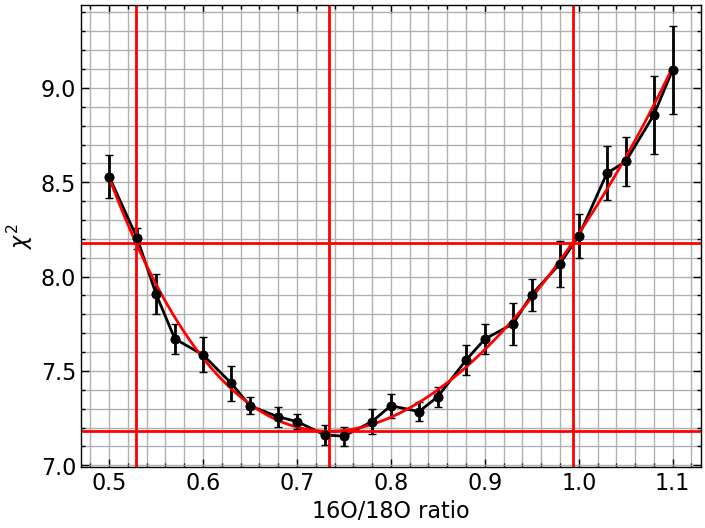

In [6]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(0.5,1.1,1000)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


0.577 -0.076 0.078


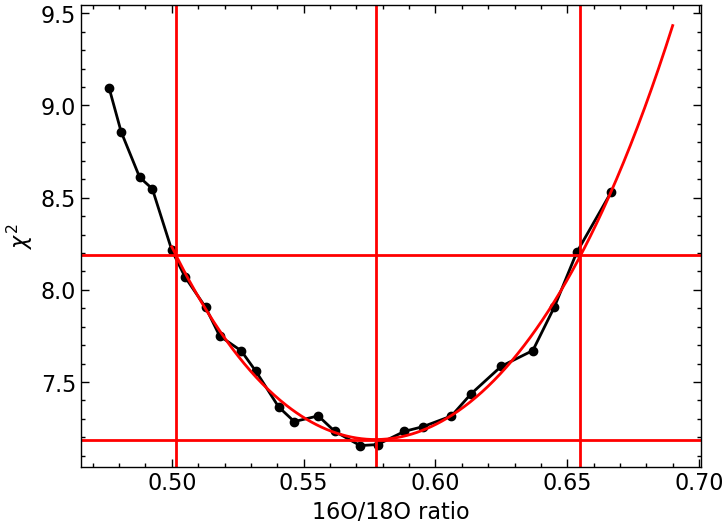

In [9]:
o18rats = 1/(1+rats)
plt.plot(o18rats, chis, 'ko-')
p = np.polyfit(o18rats, chis, 4)

# Evaluate the polynomial fit on a logarithmic scale
x = np.linspace(0.5, 0.69, 500)
y = np.polyval(p, x)

# Convert x back to the original scale for plotting
# x_original = np.exp(x)

# Plot the polynomial fit
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')

# Find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y - ybound)
idx = np.where(diff == np.min(diff))
# Find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx] - xfit).round(3), (x[idx2] - xfit).round(3)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')

print(xfit[0].round(3), xbounds[0][0], xbounds[1][0])

# Label the axes
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# plt.xscale('log')
# xs = np.linspace(np.log(300), np.log(800), 10)
# plt.plot(np.exp(xs), np.polyval(p, (xs)), 'k.')
plt.show()

<ErrorbarContainer object of 3 artists>

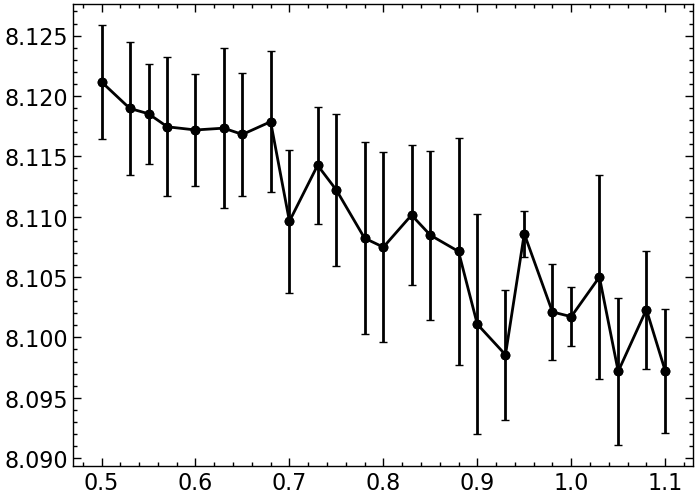

In [72]:
plt.plot(rats, np.array(oabunds)+8.77, 'ko-')
plt.errorbar(rats, np.array(oabunds)+8.77, yerr=doabunds, fmt='ko', capsize=3)
# plt.axhline(8.695)
# # plt.axhline(8.81, color='r')
# plt.axhline(8.695-0.084, color='r')
# plt.axhline(8.81+0.1, color='r')
# plt.axvline(0.52)

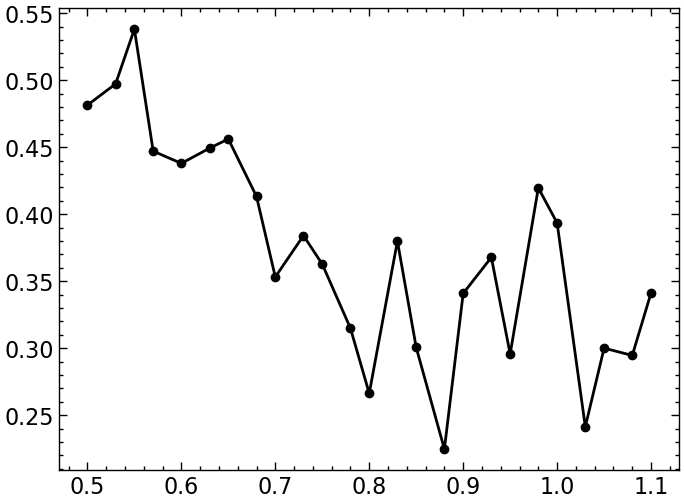

In [76]:
plt.plot(rats, rvs, 'ko-')

In [77]:
np.min(rvs), np.max(rvs)

(np.float64(0.22470436065156388), np.float64(0.5381389820872242))

In [62]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/c38/Nov-12-2024-01-49-02_0.39273491370084235_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


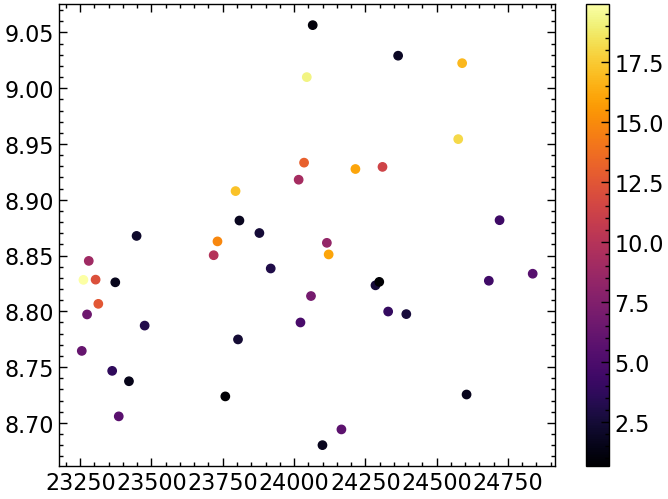

In [63]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [64]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.843), np.float64(0.088))

In [65]:
np.mean(output_trimmed['O_Fe'])

np.float64(0.07270930232558138)

In [2]:
def printexp(n, exp, filt):
    strn = f"{exp}+"*n
    strn = strn[:-1]
    strf = f"{filt}+"*n
    strf = strf[:-1]
    print(strn)
    print(strf)

In [19]:
printexp(10, 5, "r")

5+5+5+5+5+5+5+5+5+5
r+r+r+r+r+r+r+r+r+r


sudo python make_too.py -ra '16:03:18.0' -dec '1:51:46.0' -ra_rate '0.162' -dec_rate '0.014' -filt 'r+r+r+r+r+r+r+r+r+r' -exp '2+2+2+2+2+2+2+2+2+2' -noexp '20+20+20+20+20+20+20+20+20+20' -name 'CK23A030' -p '7500' -obs_type 'NS' -domesleep '50' -d '20241018' -iit_obs 'advait' -hanle_obs 'kaysang' -stack 'Y' -propnums 'P06'

In [ ]:
sudo python make_too.py -ra '15:57:38.593s' -dec '+01:44:30.128' -ra_rate '0.162' -dec_rate '0.014' -filt 'r+r+r+r+r+r+r+r+r+r' -exp '5+5+5+5+5+5+5+5+5+5' -noexp '5+5+5+5+5+5+5+5+5+5' -name 'CK23A030' -p '7900' -obs_type 'NS' -domesleep '50' -d '20241018' -iit_obs 'advait' -hanle_obs 'kaysang' -stack 'Y' -propnums 'P06'

In [17]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define the two RA/Dec pairs in HMS/DMS format
coord1 = SkyCoord(ra='16h03m18.0s', dec='1d51m46.0s', frame='icrs')
coord2 = SkyCoord(ra='16h08m57.407s', dec='+01d59m01.872s', frame='icrs')

# Calculate the total angular separation between the two coordinates
total_separation = coord1.separation(coord2)

# Calculate the separation in RA and Dec individually
ra_diff = coord2.ra - coord1.ra  # This will be an astropy Quantity
dec_diff = coord2.dec - coord1.dec  # This will be an astropy Quantity

# Convert RA difference to degrees
ra_diff_deg = ra_diff.to(u.deg)

# Print the results
print(f"Total angular separation: {total_separation.deg:.6f} degrees")
print(f"RA difference: {ra_diff_deg:.6f} degrees")
print(f"Dec difference: {dec_diff:.6f}")

#  subtract the difference from coord1

coord1_new = SkyCoord(ra=coord1.ra - ra_diff, dec=coord1.dec - dec_diff, frame='icrs')
print(coord1_new.to_string('hmsdms'))


Total angular separation: 1.418575 degrees
RA difference: 1.414196 deg degrees
Dec difference: 0.121076 deg
15h57m38.593s +01d44m30.128s
